In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [106]:
#%matplotlib inline

In [4]:
propery_data = pd.read_csv("https://data.wprdc.org/datastore/dump/8eff881d-4d28-4064-83f1-30cc991cfec7",index_col="PARID",parse_dates=True, low_memory=False)

In [5]:
#propery_data.head(5)
propery_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408800 entries, 0001G00224060300 to 1355B00009000000
Data columns (total 94 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PROPERTYHOUSENUM           408729 non-null  float64
 1   PROPERTYFRACTION           408800 non-null  object 
 2   PROPERTYADDRESS            408800 non-null  object 
 3   PROPERTYCITY               408800 non-null  object 
 4   PROPERTYSTATE              408800 non-null  object 
 5   PROPERTYUNIT               408800 non-null  object 
 6   PROPERTYZIP                408800 non-null  int64  
 7   MUNICODE                   408800 non-null  int64  
 8   MUNIDESC                   408800 non-null  object 
 9   SCHOOLCODE                 408800 non-null  int64  
 10  SCHOOLDESC                 408800 non-null  object 
 11  LEGAL1                     408790 non-null  object 
 12  LEGAL2                     360197 non-null  object 
 13  LEGAL3   

,CLASS
NEIGHBORHOOD,
Central Business District,R
Central Business District,R
Central Business District,R
Bluff,R
Bluff,R
Bluff,C
Bluff,C
Bluff,C
Bluff,C


In [6]:
propery_data[['NEIGHBORHOOD','CLASSDESC','USEDESC','YEARBLT','SALEPRICE','SALEDATE','GRADE','GRADEDESC','CONDITION','CONDITIONDESC']].head(10)

,NEIGHBORHOOD,CLASSDESC,USEDESC,YEARBLT,SALEPRICE,SALEDATE,GRADE,GRADEDESC,CONDITION,CONDITIONDESC
PARID,,,,,,,,,,
0001G00224060300,Central Business District,RESIDENTIAL,CONDOMINIUM,2007.0,699000.0,09-29-2017,A+,VERY GOOD +,3.0,AVERAGE
0001G00224060400,Central Business District,RESIDENTIAL,CONDOMINIUM,2007.0,350000.0,08-20-2012,A+,VERY GOOD +,3.0,AVERAGE
0001G00224060500,Central Business District,RESIDENTIAL,CONDOMINIUM,2007.0,265000.0,09-18-2009,A+,VERY GOOD +,3.0,AVERAGE
0002M00222000000,Bluff,RESIDENTIAL,SINGLE FAMILY,1905.0,25550.0,08-14-1995,D,BELOW AVERAGE,4.0,FAIR
0002M00223000000,Bluff,RESIDENTIAL,SINGLE FAMILY,1905.0,45550.0,08-14-1995,C,AVERAGE,3.0,AVERAGE
0002M00224000000,Bluff,COMMERCIAL,PARKING GARAGE/LOTS,NaN,85000.0,06-06-1984,NaN,NaN,NaN,NaN
0002M00225000000,Bluff,COMMERCIAL,OFFICE - 1-2 STORIES,NaN,250000.0,05-03-2017,NaN,NaN,NaN,NaN
0002M00227000000,Bluff,COMMERCIAL,OFFICE/APARTMENTS OVER,NaN,113000.0,11-08-2016,NaN,NaN,NaN,NaN
0002M00228000000,Bluff,COMMERCIAL,PARKING GARAGE/LOTS,NaN,250000.0,05-03-2017,NaN,NaN,NaN,NaN


In [12]:
# Create sets for county - property type and grade
#property_data.plot()
property_data = propery_data[['NEIGHBORHOOD','CLASS','CLASSDESC','USEDESC','YEARBLT','SALEPRICE','SALEDATE','GRADE','GRADEDESC','CONDITION','CONDITIONDESC']]

In [13]:
property_data.sort_values('NEIGHBORHOOD').head(10)

,NEIGHBORHOOD,CLASS,CLASSDESC,USEDESC,YEARBLT,SALEPRICE,SALEDATE,GRADE,GRADEDESC,CONDITION,CONDITIONDESC
PARID,,,,,,,,,,,
0023S00032000000,Allegheny Center,G,GOVERNMENT,MUNICIPAL GOVERNMENT,NaN,0.0,05-05-1950,NaN,NaN,NaN,NaN
0008C00130000000,Allegheny Center,G,GOVERNMENT,MUNICIPAL URBAN RENEWAL,NaN,0.0,08-31-1962,NaN,NaN,NaN,NaN
0008C00128000000,Allegheny Center,C,COMMERCIAL,APART:40+ UNITS,NaN,44925000.0,02-28-2014,NaN,NaN,NaN,NaN
0023R00510000000,Allegheny Center,G,GOVERNMENT,MUNICIPAL URBAN RENEWAL,NaN,0.0,02-07-1984,NaN,NaN,NaN,NaN
0008G00203000000,Allegheny Center,C,COMMERCIAL,VACANT COMMERCIAL LAND,NaN,10.0,07-07-2015,NaN,NaN,NaN,NaN
0008G00207000000,Allegheny Center,C,COMMERCIAL,PARKING GARAGE/LOTS,NaN,10.0,07-07-2015,NaN,NaN,NaN,NaN
0008G00208000900,Allegheny Center,U,UTILITIES,R.R. - USED IN OPERATION,NaN,0.0,12-31-1977,NaN,NaN,NaN,NaN
0008G00250000000,Allegheny Center,C,COMMERCIAL,VACANT COMMERCIAL LAND,NaN,1.0,07-27-2007,NaN,NaN,NaN,NaN
0008G00300000000,Allegheny Center,U,UTILITIES,INDUSTRIAL/UTILITY,NaN,0.0,03-25-1974,NaN,NaN,NaN,NaN


In [14]:
query_mask = property_data['CLASS'] == 'R'

residential = property_data[query_mask]

residential = residential[['NEIGHBORHOOD','CLASSDESC','USEDESC','YEARBLT','SALEPRICE','SALEDATE','GRADE','GRADEDESC','CONDITION','CONDITIONDESC']]

query_mask = residential['SALEPRICE'] >0.0

residential = residential[query_mask]

residential.sort_values('NEIGHBORHOOD').head(10)


,NEIGHBORHOOD,CLASSDESC,USEDESC,YEARBLT,SALEPRICE,SALEDATE,GRADE,GRADEDESC,CONDITION,CONDITIONDESC
PARID,,,,,,,,,,
0022S00081000B00,Allegheny West,RESIDENTIAL,ROWHOUSE,1903.0,1.0,01-10-2017,C+,AVERAGE +,3.0,AVERAGE
0022S00109000000,Allegheny West,RESIDENTIAL,ROWHOUSE,1870.0,299900.0,08-19-2016,C+,AVERAGE +,3.0,AVERAGE
0022S00108000000,Allegheny West,RESIDENTIAL,ROWHOUSE,1890.0,1.0,09-11-2006,C+,AVERAGE +,3.0,AVERAGE
0022S00107000000,Allegheny West,RESIDENTIAL,ROWHOUSE,1890.0,50000.0,04-25-2006,C+,AVERAGE +,3.0,AVERAGE
0022S00106000000,Allegheny West,RESIDENTIAL,ROWHOUSE,1906.0,128000.0,04-15-1999,C+,AVERAGE +,2.0,GOOD
0022S00105000000,Allegheny West,RESIDENTIAL,ROWHOUSE,1906.0,78000.0,09-13-2004,C+,AVERAGE +,2.0,GOOD
0022S00104000000,Allegheny West,RESIDENTIAL,ROWHOUSE,1906.0,142500.0,04-22-2004,C+,AVERAGE +,2.0,GOOD
0022S00103000B00,Allegheny West,RESIDENTIAL,ROWHOUSE,1906.0,135000.0,01-27-2003,C+,AVERAGE +,2.0,GOOD
0022S00103000A00,Allegheny West,RESIDENTIAL,ROWHOUSE,1906.0,35000.0,11-03-2004,C+,AVERAGE +,3.0,AVERAGE


In [21]:
#residential.pivot(columns="NEIGHBORHOOD" , values="G").head()

neighborhood = residential[['NEIGHBORHOOD','GRADE','GRADEDESC']]
neighborhood.sort_values('NEIGHBORHOOD').head(10)

,NEIGHBORHOOD,GRADE,GRADEDESC
PARID,,,
0022S00081000B00,Allegheny West,C+,AVERAGE +
0022S00109000000,Allegheny West,C+,AVERAGE +
0022S00108000000,Allegheny West,C+,AVERAGE +
0022S00107000000,Allegheny West,C+,AVERAGE +
0022S00106000000,Allegheny West,C+,AVERAGE +
0022S00105000000,Allegheny West,C+,AVERAGE +
0022S00104000000,Allegheny West,C+,AVERAGE +
0022S00103000B00,Allegheny West,C+,AVERAGE +
0022S00103000A00,Allegheny West,C+,AVERAGE +


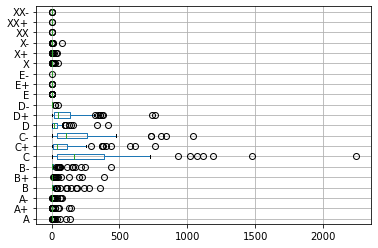

In [47]:
matplotlib.pyplot.boxplot

#pd.crosstab(neighborhood['NEIGHBORHOOD'], neighborhood['GRADE'], margins = False)



pd.crosstab(neighborhood['NEIGHBORHOOD'], neighborhood['GRADE'], margins = False).boxplot(vert = False)

In [48]:
pd.crosstab(neighborhood['NEIGHBORHOOD'], neighborhood['GRADE'], margins = False)

GRADE,A,A+,A-,B,B+,B-,C,C+,C-,D,...,D-,E,E+,E-,X,X+,X-,XX,XX+,XX-
NEIGHBORHOOD,,,,,,,,,,,,,,,,,,,,,
Allegheny West,0,0,2,7,4,25,13,44,2,2,...,1,0,0,0,0,1,0,0,0,0
Allentown,0,4,0,1,0,0,36,9,269,32,...,1,0,0,0,0,0,0,0,0,0
Arlington,0,0,0,1,0,1,93,17,75,46,...,7,0,0,0,0,0,0,0,0,0
Arlington Heights,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banksville,0,0,0,5,1,10,612,109,82,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,1,0,0,8,5,6,40,23,39,337,...,51,0,0,0,0,0,0,0,0,0
West End,0,0,0,0,0,0,11,4,15,13,...,2,0,0,0,0,0,0,0,0,0
West Oakland,0,0,0,1,0,1,118,40,53,7,...,4,0,0,0,0,0,0,0,0,0


In [81]:
#grad_mask = neighborhood[]

#unis = set(list(neighborhood['GRADE']))
#unis = unis.sort()

#ngrad = [i for i in range(1,len(unis)+1)]
#key = pd.DataFrame(dict(LET_GRADE = unis, NUM_GRADE = ngrad))
#key.head(21)

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
#Create histogram for every neighborhood
#plots = list()cnt = 1
#for i in unique(neighborhood["NEIGHBORHOOD"]) {
  #  plots[cnt] = with(filter(neighborhood == i), plot(GRADE, type = "hist"))
#}

#plot = ggplot(neighborhood, aes(x = GRADE)) +
#geom_histogram(stat = idenity) +
#faccet_grid(NEIGHBORHOOD~.)
#plot

In [117]:
import seaborn 
graph = seaborn.FacetGrid(neighborhood, row="NEIGHBORHOOD", hue="GRADE", sharey=False , sharex=False, height=5, aspect=5 )
graph = graph.map(plt.hist , 'GRADE')#, rwidth=1)#, bins = 22)#  , rwidth=1 )#, range = 1250  )